# Model Language - Word Embedding

## Data PATH

In [3]:
import os
import sys
PATH = os.getcwd()
DIR_DATA = PATH + '{0}data{0}'.format(os.sep)
sys.path.append(PATH) if PATH not in list(sys.path) else None
DIR_DATA

'C:\\Users\\epuerta\\OneDrive - Universidad Tecnológica de Bolívar\\Apps\\AppsISCO\\InteligenciaArtificial-ISCO-A06A\\laboratories\\data\\'

<a id=1></a>
## Python Libraries

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from gensim.models import Word2Vec
from spacy.tokenizer import Tokenizer
from spacy.lang.es import Spanish
import re
nlp = Spanish()
# Create a blank Tokenizer with just the English vocab
tokenizer = Tokenizer(nlp.vocab)

file_train = DIR_DATA + 'Valence_train_oc_es.csv'
file_test = DIR_DATA + 'Valence_test_oc_es.csv'

In [6]:
# Especifica el nombre del archivo CSV
# Carga el archivo CSV en un DataFrame (separacion ';'), indicando que el punto es el separador de miles
data_train = pd.read_csv(file_train,  sep=';', thousands='.')

In [7]:
data_train.head()

,ID,Tweet,Dimension,Intensity,Description
0,2018-Es-00818,Este año me tocará ir sola a la Convención de ...,valence,0,se infiere un estado emocional neutral or mixto
1,2018-Es-06065,MB si no me equivoco una vez me confundi de sn...,valence,0,se infiere un estado emocional neutral or mixto
2,2018-Es-00417,@cokep Que eres terrible fome! 🙄 Y añejo poh!,valence,-2,se infiere un estado emocional moderadamente n...
3,2018-Es-00861,Gracias por informar temas de contingencia del...,valence,-1,se infiere un estado emocional ligeramente neg...
4,2018-Es-01772,En Maipú hace falta una peluquería ATR,valence,-1,se infiere un estado emocional ligeramente neg...


In [8]:
def delete_special_patterns(text):
    """
    Remove special characters and punctuation from text.

    Parameters:
    text (str): The text to clean.

    Returns:
    str: The cleaned text.
    """
    try:
        text = re.sub(r"\©|\×|\⇔|\_|\»|\«|\~|\#|\$|\€|\Â|\�|\¬", "", text)  # Remove special characters
        text = re.sub(r"\,|\;|\:|\!|\¡|\’|\‘|\”|\“|\"|\'|\`", "", text)  # Remove punctuation
        text = re.sub(r"\}|\{|$begin:math:display$|$end:math:display$|$begin:math:text$|$end:math:text$|\<|\>|\?|\¿|\°|\|", "", text)  # Remove parentheses
        text = re.sub(r"\/|\-|\+|\*|\=|\^|\%|\&|\$", "", text)  # Remove operators
        text = re.sub(r"\b\d+(?:\.\d+)?\s+", "", text)  # Remove numbers with punctuation
        return text.lower()
    except Exception as e:
        print(f"Error delete_special_patterns: {e}")
        return ""

In [10]:
def tokenizar_texto(texto):
    # Procesar el texto con spacy
    doc = nlp(delete_special_patterns(texto))
    # Devolver una lista de tokens
    return [token.text for token in doc]

In [11]:
data = pd.DataFrame(columns =['tokens'])

In [12]:
data['tokens'] = data_train['Tweet'].apply(lambda x: tokenizar_texto(x.lower()))

In [20]:
data

,tokens
0,"[este, año, me, tocará, ir, sola, a, la, conve..."
1,"[mb, si, no, me, equivoco, una, vez, me, confu..."
2,"[@cokep, que, eres, terrible, fome, 🙄, y, añej..."
3,"[gracias, por, informar, temas, de, contingenc..."
4,"[en, maipú, hace, falta, una, peluquería, atr]"
...,...
1561,"[sale, uno, del, estadio, como, todo, preocupa..."
1562,"[no, mames, qué, fino, .]"
1563,"[me, bajo, mucho, en, la, hermana, del, , rat..."
1564,"[@vitocfc, @ssfe2017, jjaakjak, , pronto, lo,..."


In [22]:
model = Word2Vec(data['tokens'], vector_size=100, window=5, min_count=1, workers=4, sg=1)  # sg=0 para el modelo CBOW, sg=1 para Skip-gram
#model.save("word2vec.model")

In [24]:
#model = Word2Vec.load("word2vec.model")
model.train(data['tokens'], total_examples=len(data['tokens']), epochs=1000)

(17226686, 22413000)

C:\Users\epuerta\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128580 (\N{FACE WITH ROLLING EYES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\epuerta\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\epuerta\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128577 (\N{SLIGHTLY FROWNING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\epuerta\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\epuerta\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128079 (\N{C

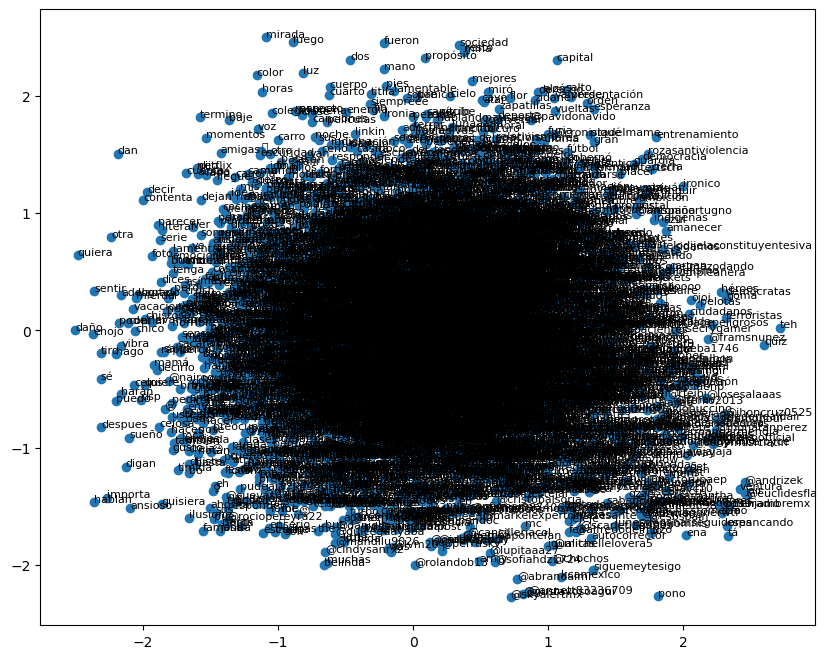

In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Obtener las palabras y sus vectores
words = list(model.wv.index_to_key)
vectors = [model.wv[word] for word in words]

# Reducción de dimensionalidad usando PCA
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Visualización
plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], marker='o')
for i, word in enumerate(words):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=8)
plt.show()

In [94]:
palabra = 'mujer'
similares = model.wv.most_similar(palabra, topn=3)
print("Palabras similares a", palabra,":", similares)

Palabras similares a mujer : [('saludo', 0.6579335331916809), ('srta', 0.6468608379364014), ('herida', 0.6449251174926758)]


In [95]:
# Operaciones de analogía
analogia = model.wv.most_similar(positive=['mujer'], negative=['hombre'], topn=1)
print("Palabra que es para 'hombre' como 'mujer' es:", analogia)

Palabra que es para 'hombre' como 'mujer' es: [('herida', 0.3751700222492218)]


In [96]:
# Obtener el vector de una palabra específica
palabra = 'hombre'
vector = model.wv[palabra]
print("Vector de ",palabra,":", vector)

Vector de  hombre : [-1.5410573  -1.2838377  -0.28962335 -0.31581724  0.24835578 -0.17750691
 -0.1363368   1.9893064  -0.3726756  -0.7548188   0.28920746 -0.20488174
  0.04830739 -0.3210887   0.33062032  0.28603095  0.69827825  0.03869869
  1.4308752  -0.934762   -0.6614141   0.5267887   0.23463368  0.03146997
 -0.7817769  -0.00663686 -1.1025826   0.60406387 -0.835552   -1.7627103
  0.7287164   0.45972833 -0.74836105 -1.35019     1.2186263   0.39105642
 -1.8653136  -0.275928   -0.3424949  -0.29443634 -0.87211996  0.15453671
 -0.35237268  0.2846432   0.4278046  -0.53671473  0.49749073  0.21276759
  0.864574    1.1096172  -0.06321833 -0.5858005   0.3496507   0.3364356
 -0.1896218  -0.21713506  0.361478   -0.7887876  -1.0930494  -0.859554
  0.8137027  -0.09334717 -0.263558   -0.05522462 -0.08827532  1.013146
  0.8654966   0.50953305 -1.0530038  -0.7449725  -0.6154225   1.0376984
  0.32850176 -0.48304555  0.41162062  0.02729491 -0.3861      0.43925157
  0.23815516  0.21593554  0.4756795   

In [ ]:
# Prueba con modelo ya entranado
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))
glove_vectors = gensim.downloader.load('glove-twitter-25')
glove_vectors.most_similar('twitter')